# N-Gramas

En algunas ocasiones la unidad lingúsitica no es una sola palabra, si no que puede ser una palabra compuesta. Si se tomaran palabras sueltas, estariamos perdiendo significados o valores que se pierden para la realización de un análisis, es por ello que existen los N-gramas, que contempla las combinaciones de N-palabras.

Ejemplo de esto útlimo se puede ver expresado a continuación:

N = 1
- Gato
- Corre
- Rápido

N = 2
- El gato
- Corre rápido
- Rápido por

N = 3
- El gato corre
- Corre rápido por
- rápido por el

N = 4
- El gato corre rápido
- Corre rápido por el
- Rápido por el parque

Analizar la secuencia de palabras en un texto es util porque:
- Comprensión del texto
- Extracción de información
- Modelización del lenguaje
- Clasificación de texto
- Generación de texto

# Dataset | Netflix



Para esta práctica, se obtendrán los datos desde un dataset que esta publicado en un repositorio público, dicho dataset contiene información sobre series publicadas en la plataforma de Netflix. Es posible encontrar la información del dataset en: https://raw.githubusercontent.com/practiceprobs/datasets/main/netflix-titles/netflix-titles.csv

La información disponible en el dataset es:

- show_id
- type
- director
- cast
- country
- date_added,
- release_year
- rating
- duration
- listed_in
- description

### Librerías utilizadas

Estas son las librerías utilizadas para el desarrollo del algoritmo utilizando N-Gramas

In [4]:
#Instalar librerias
! pip install unidecode
! pip install stop_words

#Importar librerias
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
import unidecode
from nltk.metrics import edit_distance
import pandas as pd
import stop_words
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'nltk'

**nltk | Natural Language Toolkit**

Esta librería proporciona una serie de herramientas y recursos para trabajar con texto en lenguaje natural, incluye tokenización, etiquetado de partes del discurso, análisis sintáctico, lematización, stemming, analisís de sentimientos, etc.

**matplotlib | Visualización de datos**

Esta libreria permite la visualización de datos en Python, teniendo la capacidad de generar gráficos de barras, histogramas, gráficos 3D y muchas opciones más, también permite personalizar cada aspecto de los gráficos, como los colores, etiquetas,títulos o estilos. Se utiliza para comunicar hallazgos a través de visualizaciones o gráficas.




**pandas | Manipulación, carga y análisis de datos**

Pandas proporciona estructuras de datos flexibles y eficientes, especialmente el DataFrame, el cual es una tabla bidimensional con etiquetas para las filas y las columnas. Con esta librería es posible cargar datos desde una variedad de fuentes, como archivos CSV, Excel, bases de datos SQL, etc. También realiza filtrado, agregación o manipulación de datos de manera eficiente.

**stop words | Colección de palabras vacías**

Stop Words es una librería que contiene una colección de palabras comunes que se suelen considerar como "palabras vacias", como preposiciones o conjunciones. Dichas palabras no son de interés porque no aportan relevancia en el procesamiento de lenguaje natural. Stop Words ofrece una forma efectiva de acceder a listas predefinidas de palabras vacias en varios idiomas.


**TfidVectorizer y CountVectorizer**

TfidVectorizer incluye de manera interna tokenización (los tokens son la unidad de menor medida con la que se trabaja para procesamiento de lenguaje natural). Es utilizado para convertir una colección de documentos de texto en una matriz de recuento de términos, donde cada elemento de la matriz representa el recuento de ocurrencias de un término en un documento específico

Por otra parte, CountVectorizer proporciona construcción de vocabulario y recuento de terminos en cada documento, dicha herramienta ayuda en la preparación de los datos.

### Importación de la información a partir de un dataset

Para empezar a trabajar con los datos de netflix, es necesario importar los datos, es posible trabajar con archivos o datasets de manera local o con datasets que esten publicados en internet. En este caso, se utilizara un repositorio en línea.

In [2]:
# A partir del reopositorio público, se obtiene la información mediante la librería Panda, la cuál lee un archivo csv (comma separated values)
# Impresión del Dataset de Netflix

url = 'https://raw.githubusercontent.com/practiceprobs/datasets/main/netflix-titles/netflix-titles.csv' # Ubicacion del dataset disponible en linea
netflix = pd.read_csv(url) #Leer CSV y cargar los datos

filas = 10000 #Especificar cuantos datos se desea obtener
netflix.fillna('', inplace=True) #Rellenar los valores faltantes con una cadena vacia
netflix.head(filas) #Mostrar X cantidad de filas del DataFrame, comprender la estructura y el contenido del DataFrame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Búsqueda de texto con una condición


En la funcion Busqueda se definen 4 parametros:
- Filtro: Es la condicion que se desea aplicar
- Columna: De donde obtengo la informacion de la condicion de mi busqueda
- ColumnaFiltrar: Es lo que estoy buscando con respecto a la condicion de mi busqueda
- Ngram_range(n1,n2): Define la cantidad de N-Gramas para devoler en la búsqueda

Con estos parametros la funcion devuelve una frecuencia de N-Gramas (la cual es posible especificar dependiendo el contexto de una busqueda, lo ideal es mantener bigramas y trigramas
para que la informacion sea concisa y precisa). Por lo tanto, el resultado final es una grafica que muestra las frecuencias de acuerdo a las condiciones especificadas en la funcion.

La teoria de esto es que aquellos datos con mayor repetición son aquellos con mayor relevancia dentro de un documento, en este caso, los directores o los actores de cast con mayor frecuencia son los mas relevantes en el contexto de peliculas y series que estan en la plataforma dentro de netflix.

**¿Qué hace está función?**

En la función se describe los procesos como el procesamiento del lenguaje, para limpiarlo y evitar signos, espacios o caracteres inválidos, posteriormente se aplica stopwords para evitar que en el texto existan palabras vacias o palabras que no aporten un significado al texto, despues se aplica la vectorización, la cual provee de manera interna la tokenización (unidad más pequeña para trabajar con textos) para obtener las palabras ya procesadas. Dentro de la vectorización también de define la cantidad de N-Gramas a recuperar (palabras continuas), las cuales pueden definirse en un rango, posteriormente se define la frecuencia mínima de las palabras para poder vecotrizarlas, entre más alto el número de frecuencias mínimas (min_df) menor será la cantidad de palabras tokenizadas. Finalmente, procesado el texto, se transforma el texto a una matriz y los resultados o las palabras se obtienen mediante el vectorizador.

In [3]:
def busqueda(filtro, columna, columnaFiltrar, ngram_range = (2,3)):

  netflixFiltrado = netflix[netflix[columna] == filtro] # Obtener la informacion que se desea buscar
  # Columna: ¿De que columna del dataset deseamos obtener informacion?
  # Filtro: ¿Que estamos buscando en especifico sobre una columna?

  if netflixFiltrado.empty: # Validar si el DataFrame filtrado está vacío
      print(f"No hay resultados para los filtros: {filtro} en {columna}") # Devolver mensaje de error
      return # Mensaje de error al usuario

  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada
  textos = netflixFiltrado[columnaFiltrar].str.lower().str.strip() # # Convertir a minúsculas y eliminar espacios innecesarios | Normalizar el texto

  if textos.empty or all(textos == ''): # Verificar si los textos están vacíos después del preprocesamiento
      print("Todos los textos están vacíos después del preprocesamiento.") # Devolver mensaje de error
      return # Mensaje de error al usuario

  # Aplicar stopwords para eliminar palabras vacias (aquellas que no aportan nada al texto)
  stopword_en = nltk.corpus.stopwords.words('english') # Aplicar stopwords (palabras vacias en ingles)
  stopword_es = nltk.corpus.stopwords.words('spanish') # Aplicar stopwords (palabras vacias en español)
  stop_words = stopword_en + stopword_es # Conjunto de stopwords (palabras vacias) en dos idiomas

  # Aplicar Vectorizacion y stopwords
  vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = 1, stop_words=stop_words) # Aplicar vectorizacion, tokenizando el texto recibido, aplicando n-gramas y filtro de stopwords
  X = vectorizer.fit_transform(textos) # Ajustar el CV y transformar los datos
  features = vectorizer.get_feature_names_out() # Obtener los n-gramas resultantes

  # Informacion de guia
  print("Información del dataset: \n", textos, "\n") # Conjunto de toda la información
  print("N-Gramas resultantes: \n", features) # N-gramas resultantes

  # Graficar los datos
  pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['Frecuencia']).sort_values(by='Frecuencia',
                                          ascending=False)[:20].plot(kind='barh',title='N-Gramas');

A diferencia de la función Busqueda, a este algoritmo es posible proporcionarle más condiciones con respecto a una columna, dejando de lado la limitación de que una búsqueda de texto deba de realizarse unicamente con una sola condicion, por lo tanto:

- Filtro: Son las condiciones de mis busqueda sobre una columna, expresada como una lista
- Columna: De donde obtengo la informacion de la condicion de mi busqueda
- ColumnaFiltrar: Es lo que estoy buscando con respecto a la condicion de mi busqueda
- Ngram_range(n1,n2): Define la cantidad de N-Gramas para devoler en la búsqueda

El propósito y el funcinamiento de esta función es igual que la anterior funcion (busqueda), unicamente trabaja con listas para limitar los resultados

In [4]:
# Esta funcion realiza un filtro en especifico y devuelve el resultado que nosotros especifiquemos
def busquedaListas(filtro, columna, columnaFiltrar, ngram_range = (2,3)):

  # Filtrado de la informacion
  netflixFiltrado = netflix[netflix[columna].isin(filtro)] # Obtener la informacion que se desea buscar
  # isin(filtro): Busca el contenido de filtro dentro de una columna especificada

  if netflixFiltrado.empty: # Validar si el DataFrame filtrado está vacío
      print(f"No hay resultados para los filtros: {filtro} en {columna}") # Devolver mensaje de error
      return # Mensaje de error al usuario

  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada
  textos = netflixFiltrado[columnaFiltrar].str.lower().str.strip() # # Convertir a minúsculas y eliminar espacios innecesarios | Normalizar el texto

  if textos.empty or all(textos == ''): # Verificar si los textos están vacíos después del preprocesamiento
      print("Todos los textos están vacíos después del preprocesamiento.") # Devolver mensaje de error
      return # Mensaje de error al usuario

  # Aplicar stopwords para eliminar palabras vacias (aquellas que no aportan nada al texto)
  stopword_en = nltk.corpus.stopwords.words('english') # Aplicar stopwords (palabras vacias en ingles)
  stopword_es = nltk.corpus.stopwords.words('spanish') # Aplicar stopwords (palabras vacias en español)
  stop_words = stopword_en + stopword_es # Conjunto de stopwords (palabras vacias) en dos idiomas

  # Vectorizacion
  vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = 1, stop_words=stop_words) # Aplicar vectorizacion, tokenizando el texto recibido, aplicando n-gramas y filtro de stopwords
  X = vectorizer.fit_transform(textos) # Ajustar el CV y transformar los datos
  features = vectorizer.get_feature_names_out() # Obtener los n-gramas resultantes

  # Informacion
  print("Información del dataset: \n", textos, "\n") # Conjunto de toda la información
  print("N-Gramas resultantes: \n", features) # N-gramas resultantes

  # Graficar los datos
  pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['Frecuencia']).sort_values(by='Frecuencia',
                                          ascending=False)[:20].plot(kind='barh',title='N-Gramas');

### Ejemplos | Búsquedas de texto con una condición

Para entrar más en contexto, se aplican las funciones desarrolladas anteriormente para buscar o filtrar información específica de acuerdo a ciertas necesidades.

El resultado será una gráfica, la cuál muestra la cantidad de frecuencias dentro de las palabras tokenizadas anteriormente, es decir que estos resultados son los más relevantes dentro de su área / columna de acuerdo con las condiciones puestas

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 0                                    dick johnson is dead
16      europe's most dangerous man: otto skorzeny in ...
17                                        falsa identidad
32                                          sex education
34                                tayo and little wizards
                              ...                        
5972                                     #cats_the_mewvie
7594                   norm of the north: family vacation
8099                                          straight up
8125                                          super wings
8132            surviving r. kelly part ii: the reckoning
Name: title, Length: 953, dtype: object 

N-Gramas resultantes: 
 ['100 halal' '100 humans' '13 reasons' ... 'zero ks' 'zero ks given'
 'zindagi short']
<function busqueda at 0x7bc6fff1fbe0>


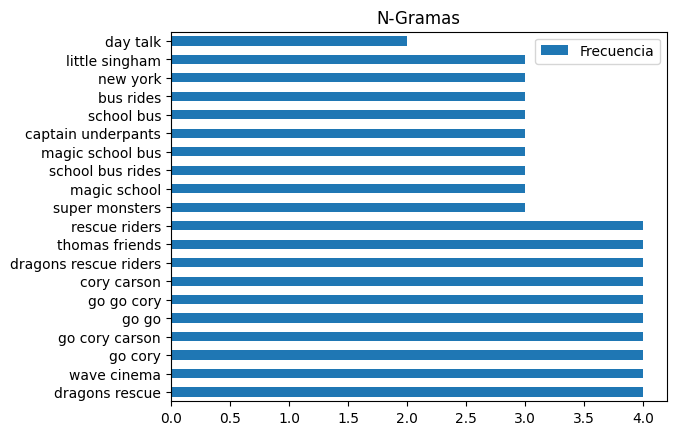

In [5]:
busqueda(2020, 'release_year', 'title', ngram_range= (2,3)) # ¿Cuáles son los titulos más publicados en la plataforma de Netflix en el año 2020?
print(busqueda)

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 0       pg-13
9       pg-13
15      tv-ma
27      pg-13
28      pg-13
        ...  
8791        r
8793       pg
8802        r
8804        r
8805       pg
Name: rating, Length: 2818, dtype: object 

N-Gramas resultantes: 
 ['66 min' '74 min' '84 min' 'nc 17' 'pg 13' 'tv 14' 'tv pg' 'tv y7'
 'tv y7 fv' 'y7 fv']
<function busqueda at 0x7bc6fff1fbe0>


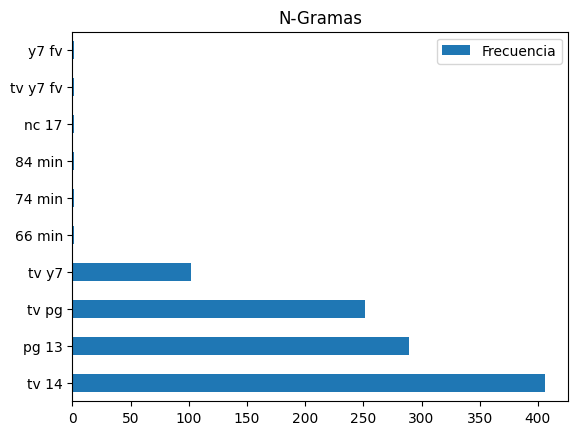

In [6]:
busqueda('United States', 'country', 'rating', ngram_range= (2,3)) # ¿Cuáles han sido los ratings más relevantes en estados unidos?
print(busqueda)

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 0       kirsten johnson
9        theodore melfi
15                     
27         dennis dugan
28        scott stewart
             ...       
8791      jason reitman
8793       raja gosnell
8802      david fincher
8804    ruben fleischer
8805       peter hewitt
Name: director, Length: 2818, dtype: object 

N-Gramas resultantes: 
 ['aaron hann' 'aaron hann mario' 'aaron lieber' ... 'zoe lister jones'
 'àlex pastor' 'àlex pastor david']
<function busqueda at 0x7bc6fff1fbe0>


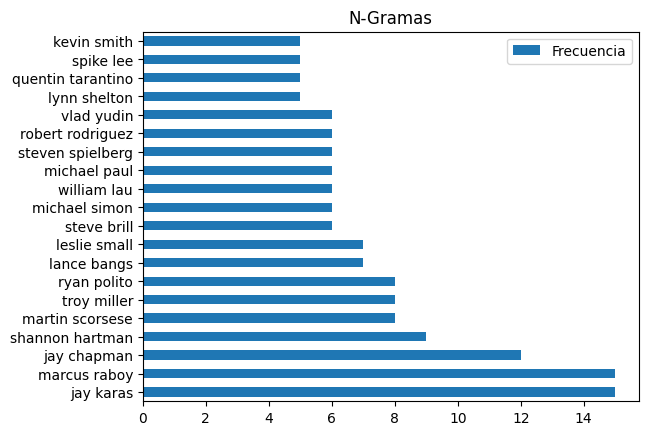

In [7]:
busqueda('United States', 'country', 'director', ngram_range= (2,3)) # ¿Cuáles han sido los directores más relevantes en Estados Unidos?
print(busqueda)

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 8       mel giedroyc, sue perkins, mary berry, paul ho...
32      asa butterfield, gillian anderson, ncuti gatwa...
65      beth chalmers, david holt, marcel mccalla, ter...
72                      jack whitehall, michael whitehall
98      antonio aakeel, chipo chung, simon foster, ter...
                              ...                        
8740                                        dougray scott
8741                                     alexander siddig
8744                                                     
8758                   anita rani, ade adepitan, dan snow
8786    lily o'regan, jeannettsy enriquez borges, joel...
Name: cast, Length: 419, dtype: object 

N-Gramas resultantes: 
 ['aakeel chipo' 'aakeel george' 'aaron marsden' ... 'øyen arthur'
 'ünalmış birce' 'ṣọpẹ dìrísù']
<function busqueda at 0x7bc6fff1fbe0>


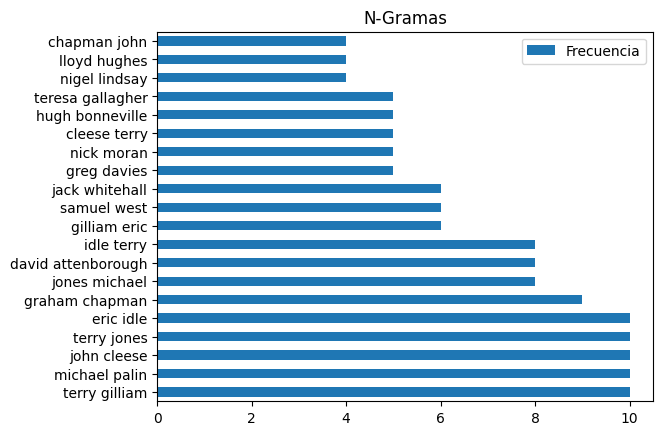

In [8]:
busqueda('United Kingdom', 'country', 'cast', ngram_range= (2,2)) # ¿Cuáles han sido los actores más relevantes en el Reino Unido?
print(busqueda)

<ipython-input-4-38c0a8689b90>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 94                 raja gosnell
117                luke holland
155                  jim henson
177             j. lee thompson
284              vince marcello
                 ...           
8354                  rob cohen
8452            joel schumacher
8457    peter lord, jeff newitt
8564              michael apted
8603         roger spottiswoode
Name: director, Length: 75, dtype: object 

N-Gramas resultantes: 
 ['andrea arnold' 'andrew mogel' 'andré øvredal' 'andy serkis'
 'anthony byrne' 'antonio campos' 'barney clay' 'christopher smith'
 'claire mccarthy' 'danny boyle' 'david leveaux' 'david mackenzie'
 'duncan jones' 'gareth evans' 'jarrad paul' 'jarrad paul andrew'
 'jeff newitt' 'jeff nichols' 'jennifer brea' 'jesse johnson' 'jim henson'
 'jim hosking' 'joel schumacher' 'john crowley' 'john stephenson'
 'jonathan baker' 'julie dash' 'ken hughes' 'lasse hallström'
 'lee tamahori' 'lee thompson' 'liam donnell' 'lord jeff'
 'lord jeff newitt' 'luke hol

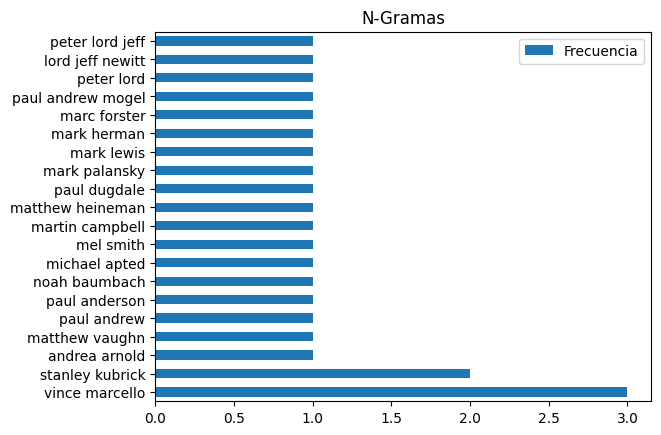

In [9]:
busquedaListas(['United Kingdom, United States'], 'country', 'director', ngram_range= (2,3)) # ¿Cuales son los directores mas relevantes de Estados Unidos y Reino Unido?
print(busqueda)

### Búsquedas de descripciones de series y películas con base a un año en especifico

¿Que nos dicen las descripciones de peliculas y series sobre los lanzamientos de un año en específico? Con está función es posible obtener un conjunto de N-Gramas para conocer lo más relevante del año, no solamente en cuanto a información de descripción de la serie o pelicula, si no de todas las columnas disponibles.

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 1         international tv shows, tv dramas, tv mysteries
2       crime tv shows, international tv shows, tv act...
3                                  docuseries, reality tv
4       international tv shows, romantic tv shows, tv ...
5                      tv dramas, tv horror, tv mysteries
                              ...                        
1468                       comedies, international movies
1551                                             kids' tv
1696                                             kids' tv
2920                        reality tv, romantic tv shows
8437            stand-up comedy & talk shows, tv comedies
Name: listed_in, Length: 592, dtype: object 

N-Gramas resultantes: 
 ['action adventure' 'action adventure anime' 'action adventure comedies'
 'action adventure dramas' 'action adventure horror'
 'action adventure international' 'action adventure tv' 'adventure anime'
 'adventure anime features' 'adventure comedies'
 'adventure come

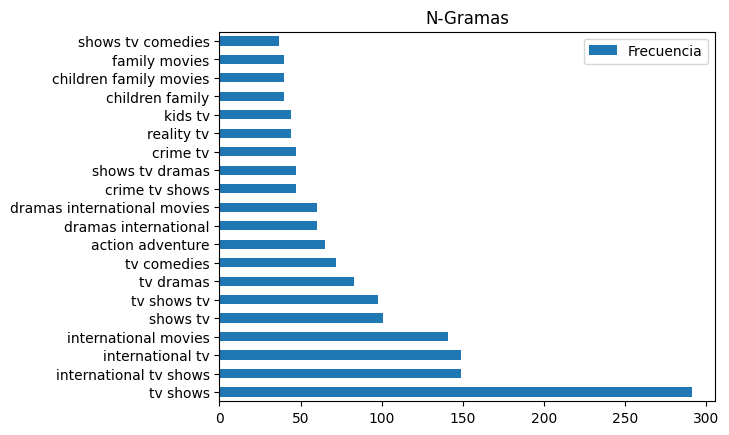

In [10]:
busqueda(2021, 'release_year', 'listed_in', ngram_range=(2,3))

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 0       as her father nears the end of his life, filmm...
16      declassified documents reveal the post-wwii li...
17      strangers diego and isabel flee their home in ...
32      insecure otis has all the answers when it come...
34      tayo speeds into an adventure when his friends...
                              ...                        
5972    this pawesome documentary explores how our fel...
7594    stressed by his duties as king and father, nor...
8099    when a gay brainiac with ocd questions his ide...
8125    a cheerful jet and his transforming pals striv...
8132    as more women come forward with harrowing accu...
Name: description, Length: 953, dtype: object 

N-Gramas resultantes: 
 ['000 chance' '000 chance become' '000 euros' ... 'zoya akhtar anurag'
 'ángel develops' 'ángel develops deadly']


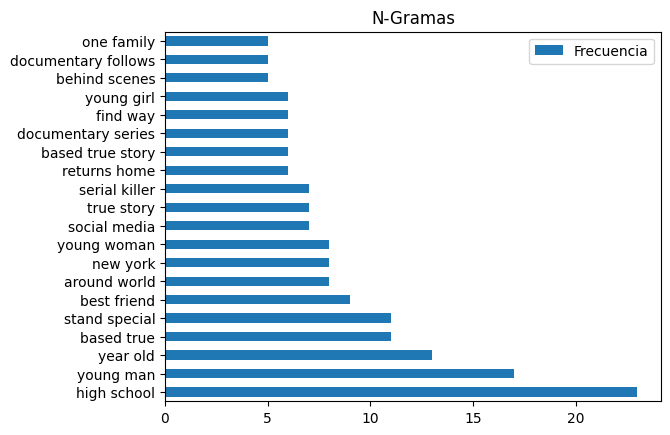

In [11]:
busqueda(2020, 'release_year', 'description', ngram_range=(2,3))

<ipython-input-3-ebb5fc66b537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 87      titipo the train is out to prove that he's got...
90      uma wakes up in a lush tropical facility desig...
100     an intergalactic device transforms toy cars in...
121     when he's invited to manage a hotel for dead s...
165     three friends in their 70s step out of retirem...
                              ...                        
8516    based on dr. ahron bregman's book, this docume...
8631    drag queen trixie mattel deals with the bitter...
8718    a look into the journey of influential strengt...
8752    after surviving a life-threatening accident, a...
8756    for the 50th anniversary of the legendary wood...
Name: description, Length: 1030, dtype: object 

N-Gramas resultantes: 
 ['000 euro' '000 euro prize' '000 euros' ... 'zumbo looks next'
 'álvaro school' 'álvaro school drama']


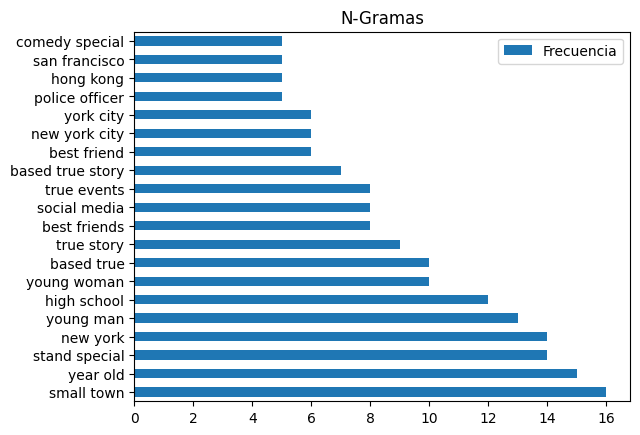

In [12]:
busqueda(2019, 'release_year', 'description', ngram_range=(2,3))

### Búsqueda de texto con dos condiciones

Estas nuevas funcionas tienen el mismo procesos que las ya definidas anteriormente, no osbtante es posible filtrar aun mas la busqueda debido a que ahora la busqueda se puede realizar medainte dos columnas, por lo que:

- Filtro1 y filtro2: Son las condiciones que se desean aplicar
- Columna1 y columna2: De donde obtengo la informacion con las condiciones de la búsqueda
- ColumnaFiltrar: Es lo que estoy buscando con respecto a la condicion de mi busqueda
- Ngram_range: Define la cantidad de N-Gramas para devoler en la búsqueda

In [13]:
def busquedaCriterios(filtro1, columna1, filtro2, columna2, columnaFiltrar, ngram_range = (2,3)):
    # Filtrado de la informacion
    netflixFiltrado = netflix[(netflix[columna1] == filtro1) & (netflix[columna2] == filtro2)] # Es necesario especificar las columnas y lo que deseamos buscar
    # filtro1 y filtro2: ¿Que estamos buscando en especifico sobre una columna?

    if netflixFiltrado.empty: # Validar si el DataFrame filtrado está vacío
        print(f"No hay resultados para los filtros: {filtro1} en {columna1} y {filtro2} en {columna2}") # Devolver mensaje de error
        return # Mensaje de error al usuario

    netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada
    textos = netflixFiltrado[columnaFiltrar].str.lower().str.strip() # Convertir a minúsculas y eliminar espacios innecesarios | Normalizar el texto

    if textos.empty or all(textos == ''): # Verificar si los textos están vacíos después del preprocesamiento
        print("Todos los textos están vacíos después del preprocesamiento.") # Devolver mensaje de error
        return # Mensaje de error al usuario

    # Aplicar stopwords para eliminar palabras vacias (aquellas que no aportan nada al texto)
    stopword_en = nltk.corpus.stopwords.words('english') # Aplicar stopwords (palabras vacias en ingles)
    stopword_es = nltk.corpus.stopwords.words('spanish') # Aplicar stopwords (palabras vacias en español)
    stop_words = stopword_en + stopword_es # Conjunto de stopwords (palabras vacias) en dos idiomas

    # Vectorizazcion
    vectorizer = CountVectorizer(ngram_range = ngram_range, min_df=1, stop_words=stop_words) # Aplicar vectorizacion, tokenizando el texto recibido, aplicando n-gramas y filtro de stopwords
    X = vectorizer.fit_transform(textos) # Ajustar el CV y transformar los datos
    features = vectorizer.get_feature_names_out() # Obtener los n-gramas resultantes

    # Informacion
    print("Información del dataset: \n", textos, "\n") # Conjunto de toda la información
    print("N-Gramas resultantes: \n", features) # N-gramas resultantes

    #Graficar los datos
    pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['Frecuencia']).sort_values(by='Frecuencia',
                                          ascending=False)[:20].plot(kind='barh',title=f'N-Gramas más frecuentes en {filtro1} y {filtro2}');

In [14]:
def busquedaCriteriosListas(filtro1, columna1, filtro2, columna2, columnaFiltrar, ngram_range = (2,3)):
    # Filtrado de la informacion
    netflixFiltrado = netflix[(netflix[columna1].isin(filtro1)) & (netflix[columna2].isin(filtro2))] # Es necesario especificar las columnas y lo que deseamos buscar
    # isin(filtro): Busca el contenido de filtro dentro de una columna especificada, en esta funcion se especifican 2

    if netflixFiltrado.empty: # Validar si el DataFrame filtrado está vacío
        print(f"No hay resultados para los filtros: {filtro1} en {columna1} y {filtro2} en {columna2}") # Devolver mensaje de error
        return # Mensaje de error al usuario

    netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada
    textos = netflixFiltrado[columnaFiltrar].str.lower().str.strip() # Convertir a minúsculas y eliminar espacios innecesarios | Normalizar el texto

    if textos.empty or all(textos == ''): # Verificar si los textos están vacíos después del preprocesamiento
        print("Todos los textos están vacíos después del preprocesamiento.") # Devolver mensaje de error
        return # Mensaje de error al usuario

    # Aplicar stopwords para eliminar palabras vacias (aquellas que no aportan nada al texto)
    stopword_en = nltk.corpus.stopwords.words('english') # Aplicar stopwords (palabras vacias en ingles)
    stopword_es = nltk.corpus.stopwords.words('spanish') # Aplicar stopwords (palabras vacias en español)
    stop_words = stopword_en + stopword_es # Conjunto de stopwords (palabras vacias) en dos idiomas

    # Vectorizazcion
    vectorizer = CountVectorizer(ngram_range = ngram_range, min_df=1, stop_words=stop_words) # Aplicar vectorizacion, tokenizando el texto recibido, aplicando n-gramas y filtro de stopwords
    X = vectorizer.fit_transform(textos) # Ajustar el CV y transformar los datos
    features = vectorizer.get_feature_names_out() # Obtener los n-gramas resultantes

    # Informacion
    print("Información del dataset: \n", textos, "\n") # Conjunto de toda la información
    print("N-Gramas resultantes: \n", features) # N-gramas resultantes

    #Graficar los datos
    pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['Frecuencia']).sort_values(by='Frecuencia',
                                          ascending=False)[:20].plot(kind='barh',title=f'N-Gramas más frecuentes en {filtro1} y {filtro2}');

### Ejemplos | Búsqueda de textos con dos condiciones

<ipython-input-14-77188c97042d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 18                 intrusion
29                  paranoia
122               in the cut
150              in too deep
358                  the net
                ...         
8535      the trigger effect
8537               the trust
8566    the wrong babysitter
8648              two graves
8704      we belong together
Name: title, Length: 65, dtype: object 

N-Gramas resultantes: 
 ['along came' 'along came spider' 'american hangman' 'angels demons'
 'bad match' 'belong together' 'borden took' 'borden took ax'
 'came spider' 'cop car' 'da vinci' 'da vinci code' 'dangerous lies'
 'deadly illusions' 'deviant love' 'domestic disturbance'
 'double jeopardy' 'fatal affair' 'hostage house' 'jacob ladder'
 'killer cove' 'kind murder' 'kiss girls' 'lethal love' 'little stalker'
 'lizzie borden' 'lizzie borden took' 'lizzie borden took ax'
 'lying stealing' 'miss sloane' 'panic room' 'perfect stranger'
 'pretty little' 'pretty little stalker' 'running time' 'rust creek

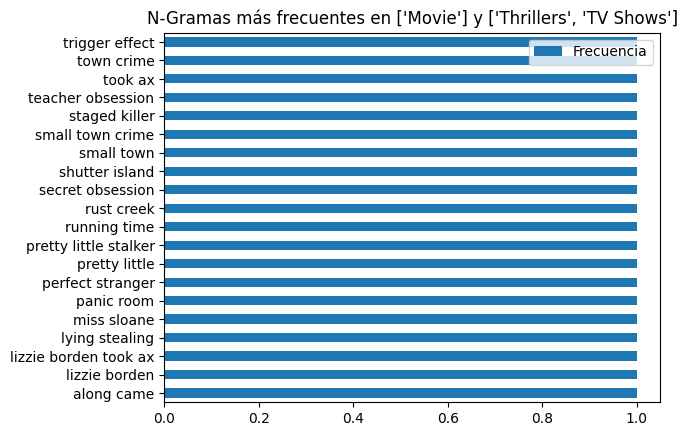

In [15]:
busquedaCriteriosListas(['Movie'], 'type', ['Thrillers', 'TV Shows'], 'listed_in', 'title',  ngram_range = (2,5)) # Cuales son los titulos de las peliculas con categoria de Thrillers  y TV shows
print(busquedaCriteriosListas) # Impresión del filtro realizado

<ipython-input-14-77188c97042d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 757          june 4, 2021
1150       march 30, 2021
1161       march 26, 2021
1303    february 17, 2021
1745     november 3, 2020
              ...        
8620     november 1, 2016
8677        march 1, 2017
8692    december 26, 2017
8739       march 31, 2017
8763       march 31, 2017
Name: date_added, Length: 76, dtype: object 

N-Gramas resultantes: 
 ['april 20 2018' 'april 22 2017' 'april 24 2018' 'april 25 2018'
 'august 15 2014' 'december 12 2018' 'december 21 2016' 'december 26 2017'
 'february 12 2019' 'february 17 2021' 'february 22 2017'
 'january 14 2019' 'january 15 2018' 'january 19 2019' 'january 24 2014'
 'july 14 2017' 'july 18 2017' 'july 28 2017' 'july 29 2020'
 'june 13 2019' 'june 15 2017' 'june 15 2019' 'june 16 2017'
 'march 10 2017' 'march 26 2021' 'march 30 2021' 'march 31 2017'
 'may 15 2017' 'may 24 2019' 'may 26 2016' 'may 28 2020'
 'november 21 2017' 'october 22 2018' 'october 23 2019' 'october 28 2016'
 'october 28 2020' 'septembe

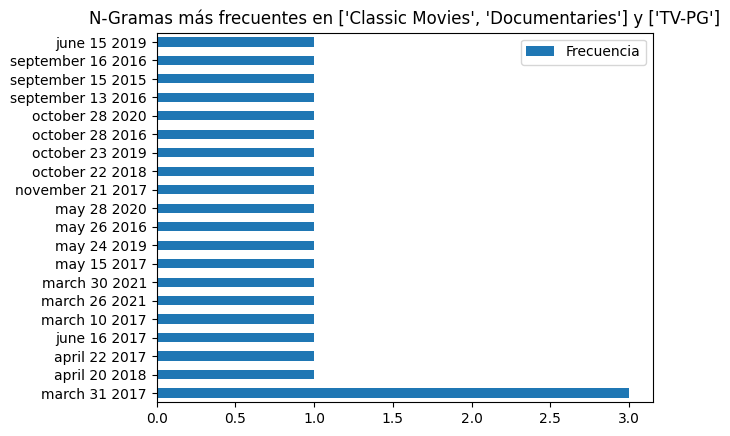

In [16]:
busquedaCriteriosListas(['Classic Movies', 'Documentaries'], 'listed_in', ['TV-PG'], 'rating', 'date_added', ngram_range = (3,3)) # Cuales son las fechas en las que se agregaron peliculas clasicas y documentales (criterio 1) con categoria TV-PG (criterio 2)
print(busquedaCriteriosListas) # Impresión del filtro realizado

<ipython-input-13-76646246d5be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 721                    mike gunther
1178             dimitri logothetis
1190                 liam o'donnell
1633                    brian skiba
1659                 matt eskandari
1835                    ross boyask
1936                 dallas jackson
2083               jesse v. johnson
2132    henry joost, ariel schulman
2176                   mike gunther
2250          gina prince-bythewood
Name: director, dtype: object 

N-Gramas resultantes: 
 ['ariel schulman' 'brian skiba' 'dallas jackson' 'dimitri logothetis'
 'gina prince' 'gina prince bythewood' 'henry joost' 'henry joost ariel'
 'jesse johnson' 'joost ariel' 'joost ariel schulman' 'liam donnell'
 'matt eskandari' 'mike gunther' 'prince bythewood' 'ross boyask']
<function busquedaCriterios at 0x7bc700afed40>


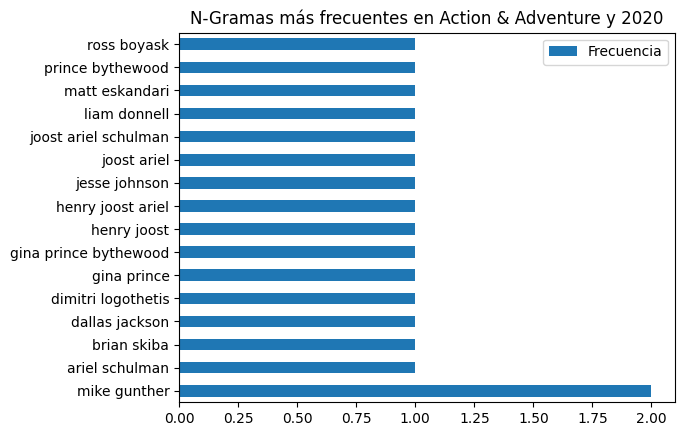

In [17]:
busquedaCriterios('Action & Adventure', 'listed_in', 2020, 'release_year', 'director', ngram_range=(2,3)) # Cuales son los directores mas relevantes que dirigieron peliculas de accion y aventura en 2020
print(busquedaCriterios) # Impresión del filtro realizado

<ipython-input-13-76646246d5be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 15                                 tv comedies, tv dramas
96                        documentaries, music & musicals
101                          documentaries, sports movies
125     crime tv shows, tv action & adventure, tv come...
152                                              comedies
                              ...                        
8710                               tv comedies, tv dramas
8716          comedies, horror movies, independent movies
8734        documentaries, lgbtq movies, music & musicals
8756                      documentaries, music & musicals
8760         horror movies, independent movies, thrillers
Name: listed_in, Length: 928, dtype: object 

N-Gramas resultantes: 
 ['action' 'action adventure' 'adventure' 'adventure comedies'
 'adventure dramas' 'adventure horror' 'adventure independent'
 'adventure sci' 'adventure tv' 'anime' 'anime features' 'anime series'
 'british' 'british tv' 'classic' 'classic cult' 'classic movies'
 '

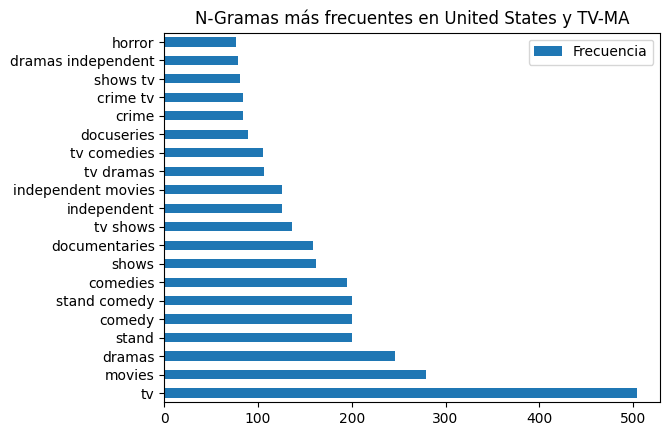

In [18]:
busquedaCriterios('United States', 'country', 'TV-MA', 'rating', 'listed_in', ngram_range=(1,2)) # Cuales son las categorias de estados unidos con clasificacion TV-MA
print(busqueda) # Impresión del filtro realizado

<ipython-input-14-77188c97042d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


Información del dataset: 
 152     jai brooks, luke brooks, james yammouni, danie...
426     rachel house, briar grace-smith, tanea heke, t...
701     asivak koostachin, shafin karim, mozhdah jamal...
910     kelvin harrison jr., jennifer hudson, jeffrey ...
1089                    joey bada$$, andrew howard, zaria
                              ...                        
8269    geoffrey rush, ewen leslie, paul schneider, mi...
8427    greta gregory, mark mitchinson, bruce hopkins,...
8505    josh duhamel, giancarlo esposito, famke jansse...
8536    steve coogan, rob brydon, marta barrio, claire...
8685    connor swindells, fola evans-akingbola, nichol...
Name: cast, Length: 66, dtype: object 

N-Gramas resultantes: 
 ['adam brody' 'adam brody zachary' 'adam scott' ... 'zak santiago liane'
 'zehetner todd' 'zehetner todd louiso']
<function busqueda at 0x7bc6fff1fbe0>


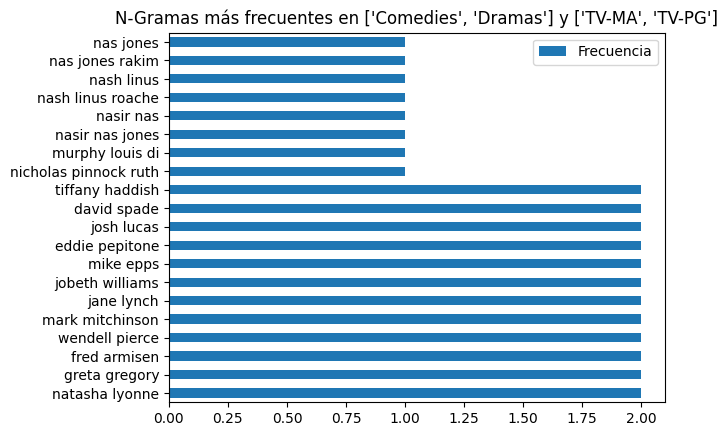

In [19]:
busquedaCriteriosListas(['Comedies', 'Dramas'], 'listed_in', ['TV-MA', 'TV-PG'], 'rating', 'cast', ngram_range=(2,3)) # Cuales son los actores que participan en peliculas o series de comedia o dramas (criterio 1) con clasificacione TV-MA o TV-PG (criterio 2)
print(busqueda) # Impresión del filtro realizado

No hay resultados para los filtros: Docuseries en listed_in y TV-G en rating
<function busquedaCriterios at 0x7bc700afed40> 

Información del dataset: 
 320         august 3, 2021
499           july 7, 2021
1042        april 15, 2021
1075        april 13, 2021
1627      december 1, 2020
1947    september 28, 2020
2568           may 2, 2020
3892        april 26, 2019
4266     december 21, 2018
4521      october 11, 2018
6139           may 2, 2019
6174                      
6262      february 1, 2019
7176     february 22, 2017
7177        march 14, 2017
7285      january 18, 2019
7576         march 1, 2017
7648     november 15, 2016
7679         july 20, 2018
8287    september 30, 2018
8422      november 1, 2017
8503    september 30, 2018
Name: date_added, dtype: object 

N-Gramas resultantes: 
 ['april 13 2021' 'april 15 2021' 'april 26 2019' 'december 21 2018'
 'february 22 2017' 'january 18 2019' 'july 20 2018' 'march 14 2017'
 'november 15 2016' 'october 11 2018' 'september 28 2020'


<ipython-input-13-76646246d5be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixFiltrado[columnaFiltrar] = netflixFiltrado[columnaFiltrar].apply(lambda x: x[:1000]) # Limitar la longitud de los textos en la columna especificada


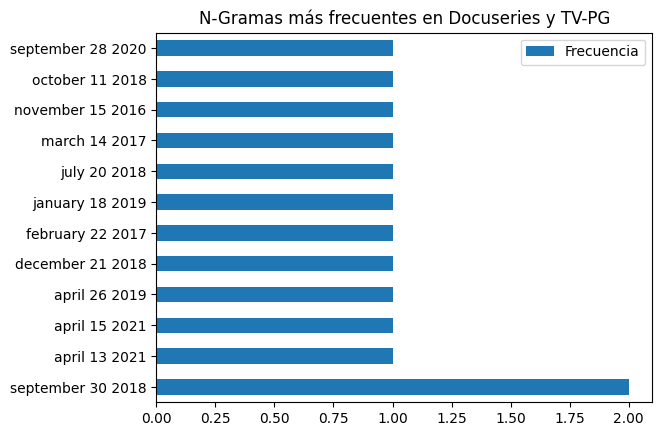

In [20]:
busquedaCriterios('Docuseries', 'listed_in', 'TV-G', 'rating', 'date_added', ngram_range=(3,3)) # Cuales son las fechas en las que se agregaron docuseries con clasificacion TV-G
print(busquedaCriterios, "\n") # Impresión del filtro realizado

# Interpretacion de la informacion
# No existen docuseries con clasificacion TV-G (apta para todo publico)

busquedaCriterios('Docuseries', 'listed_in', 'TV-PG', 'rating', 'date_added', ngram_range=(3,3)) # Cuales son las fechas en las que se agregaron docuseries con clasificacion TV-PG
print(busquedaCriterios) # Impresión del filtro realizado

# Interpretacion de la informacion
# Las docuseries con clasificacion TV-G (con supervision de los padres) fueron publicadas en: 'septiembre 30 de 2018' (en esta fecha se publicaron dos), 'abril 13 de 2021'...

## Funciones internas dentro de los métodos utilizados por las librerías

In [22]:
# ¿Que información se desea obtener de la tabla obtenida del repositorio?
netflix['description'] = netflix['description'].apply(lambda x: x[:1000]) #Obtener la columna de "description" de los datos de Netflix
corpus = netflix['description'] # Definir una variable auxiliar para guardar la columna descrita anteriormente
print(corpus) #Imprimir los textos recibidos del CSV

# Realizar la vectorización de texto utilizando un enfoque de conteo de n-gramas
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1,1), min_df = 10) #Crear un vector, tokenizar las palabras de un texto recibido
# En resumen, incluir los textos que tengan de x a y cantidad de palabras y que se repitan por lo menos N cantidad de veces

# El vector es igual a:
  # - analyzer = 'word': Indica que cada termino en el texto se trata com una palabra individual
  # - ngram_range: Especifica el rango de longitud de los n-gramas que se generaran durante la tokenización del texto
  #   por lo tanto aquí se puede especificar la cantidad de palabras que se desea rescatar para aplicar coincidencias sobre las palabras
  #   más importantes de un texto
  # - min_df = 20: Especifica el número mínimo de veces que un término debe aparecer en el conjunto de documentos (en este caso columnas
  #   recuperadas del CSV) para incluir en el vocabulario aquellos terminos que aparezcan al menos "x" cantidad de veces en el conjunto de
  #   de textos

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object


In [23]:
# Utilizar fit.transform para ajustar el CV y transformar los datos
X = vectorizer.fit_transform(corpus) # Ajustar el vector al conjunto de textos y transformar los textos en una matriz de términos de documentos
  # - fit: En esta fase, fit construye el vocabulario utilizando los textos proporcionados y calcula estadísticas como la frecuencia de términos
  # - transform: El vectorizador transforma los textos en una matriz de términos de documentos resultantes, utilizando las estadísticas calculadas durante el ajuste

  # - Por lo tanto, X contendrá entonces la matriz de términos de documentos resultante, donde cada fila representa un documento, y cada columna representa un término
  #   o n-grama, los valores representan la frecuencia de este término en dicho documento o texto.

print("Matriz")
print(X, "\n") # Imprimir matriz

print("La matriz convertida en arreglo")
print(X.toarray(), "\n") # Convertir una matriz en una lista / arreglo

# Interpretación de los resultados
# (0, 162)	1
# (0, 542)	1
# (0, 1190)	1
# (0, 355)	1
# (0, 885)	1
# (0, 604)	1
# (0, 588)	1
# ...

# (0, 162) -
# Cada fila representa un documento (texto o columna que se recupero del CSV de netflix)
# El primer numero entre parentesis infica el índice del término en el vocabulario
# El segundo numero entre parentesis indica el índice del término en el vocabulario
# El numero fuera del parentesis indica la frecuencia de ese termino en el texto correspondiente

# Por ejemplo, la primera línea (0, 162) 1 significa que en el primer documento del cuerpo del texto (índice 0), el término con índice 162 en el vocabulario
# (por ejemplo, la palabra correspondiente) aparece una vez.
# Esto significa que el término correspondiente al índice 162 en el vocabulario está presente en el primer texto de todos los textos (todos los textos = corpus) proporcionados
# (en este caso serían todas las descripciones) y entonces 1 fuera de parentesis, indica que se repite una vez en el primer texto.

print("Indice de palabras")
indicePalabras = vectorizer.get_feature_names_out() # Indice palabras
print(indicePalabras) # Utilizando .get_feature_names_out() es posible acceder al indice de palabras
# El indice de palabras ya contiene todas las palabras tokenizadas y con el número mínimo de frecuencia definido anteriormente

Matriz
  (0, 159)	1
  (0, 1101)	1
  (0, 865)	1
  (0, 2361)	2
  (0, 764)	1
  (0, 1628)	1
  (0, 1121)	2
  (0, 1382)	1
  (0, 899)	1
  (0, 2210)	1
  (0, 603)	1
  (0, 1200)	1
  (0, 119)	1
  (0, 2595)	1
  (0, 2404)	1
  (0, 1096)	1
  (0, 2364)	1
  (0, 282)	1
  (0, 831)	1
  (1, 1101)	1
  (1, 2404)	1
  (1, 73)	1
  (1, 1710)	1
  (1, 168)	2
  (1, 1701)	1
  :	:
  (8805, 172)	1
  (8805, 2279)	1
  (8805, 1502)	1
  (8805, 2564)	1
  (8805, 848)	1
  (8806, 2361)	1
  (8806, 1628)	1
  (8806, 1121)	3
  (8806, 119)	1
  (8806, 850)	1
  (8806, 1247)	1
  (8806, 329)	1
  (8806, 1707)	1
  (8806, 2594)	1
  (8806, 2615)	1
  (8806, 287)	1
  (8806, 31)	1
  (8806, 834)	1
  (8806, 2043)	1
  (8806, 2491)	1
  (8806, 1558)	1
  (8806, 2474)	1
  (8806, 869)	1
  (8806, 1775)	1
  (8806, 724)	1 

La matriz convertida en arreglo
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Indice de palabras
['000' '10' '100' ... 'youth' 'zany' 'zombie']


In [24]:
doc_term_matrix = pd.DataFrame (X.toarray (), columns = vectorizer. get_feature_names_out())
# - pd.DataFrame: Crear un DataFrame de pandas utilizando la amtriz generada por x.toarray()
# - X.toarray(): Convierte en una matriz, la cual tiene información con una estructura de datos manejable para operaciones (como la conversión del DataFrame)
# - Columns = vectorizer.get_features_names_out: Asignar los nombres de las columnas con los tokens dentro del vectorizador
doc_term_matrix # Imprimir el DataFrame

# Este DataFrame muestra la frecuencia de las palabras que están dentro del vectorizador en relación con cada uno
# de los textos que recuperamos del DataSet de Netflix

,000,10,100,11,12,13,14,15,16,17,...,years,yet,york,you,young,younger,your,youth,zany,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


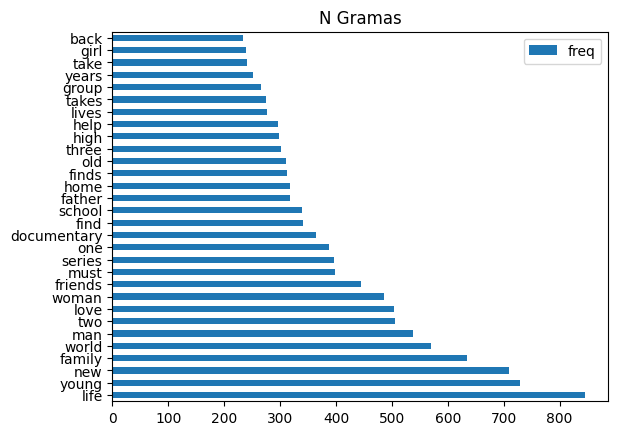

In [25]:
nlp = spacy.load('en_core_web_sm') # Inicializar spaCy con el modelo en español
# nlp = spacy.load('es_core_news_md') para español

# Función para lematizar una palabra
def lemmatize_word(word):
    doc = nlp(word) #Cargar las palabras dentro del modelo
    lemma = doc[0].lemma_  # Tomar el lema de la primera palabra en el documento
    return lemma # Devolver las palabras lematizadas

# Stopwords para eliminar palabras vacias (aquellas que no aportan nada al texto)
stopword_en = nltk.corpus.stopwords.words('english') # Aplicar stopwords (palabras vacias en ingles)
stopword_es = nltk.corpus.stopwords.words('spanish') # Aplicar stopwords (palabras vacias en español)
stop_words = stopword_en + stopword_es # Conjunto de stopwords (palabras vacias) en dos idiomas

# Obtener la informacion
netflix['description'] = netflix['description'].apply(lambda x: x[:1000]) #Obtener la columna de "description" de los datos de Netflix
corpus = netflix['description'].str.lower().str.strip() # Normalización del texto, convertir a minusculas todo el texto y eliminar espacios innecesarios

# Vectorizar y aplicar stopwords
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1,1), min_df = 10, stop_words=stop_words) # Se aplica stopword en este vectorizador para evitar tener palabras vacías
X = vectorizer.fit_transform(corpus) # Transformar el texto

# Obtener las palabras del vectorizador
indicePalabras = vectorizer.get_feature_names_out() # Conjunto de palabras ya tokenizadas por el vectorizador

for word in indicePalabras: # Recorrer el indice de palabras
    lemma = lemmatize_word(word) # Lematizar las palabras tokenizadas
    # print(lemma)

#Graficar los datos
pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['freq']).sort_values(by='freq',
                                          ascending=False)[:30].plot(kind='barh',title='N Gramas');